In [342]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder


df = pd.read_csv("lending-club-data1a.csv")

In [343]:
df.head(5)

,loan_amnt,term,int_rate,credit,emp_length,home_ownership,annual_inc,dti,bad_loans
0,5650,36 months,18.85,3,4,MORTGAGE,58000.0,29.61,1
1,20000,60 months,18.25,3,1,RENT,102000.0,9.26,1
2,6000,60 months,16.82,2,2,RENT,44301.0,17.77,1
3,30000,60 months,24.50,1,8,MORTGAGE,111000.0,21.24,1
4,24000,36 months,11.49,5,4,MORTGAGE,92000.0,24.74,0


In [344]:
df['term'] = df['term'].str.split().str[0]
mapping = {"RENT": 1, "MORTGAGE":2, "OWN":3, "OTHER": 0}
df['home_ownership'] = df['home_ownership'].map(mapping)
df.head()


,loan_amnt,term,int_rate,credit,emp_length,home_ownership,annual_inc,dti,bad_loans
0,5650,36,18.85,3,4,2,58000.0,29.61,1
1,20000,60,18.25,3,1,1,102000.0,9.26,1
2,6000,60,16.82,2,2,1,44301.0,17.77,1
3,30000,60,24.50,1,8,2,111000.0,21.24,1
4,24000,36,11.49,5,4,2,92000.0,24.74,0


In [345]:
#normalize columns using sci-kitlearn minmaxscaler
scaler = MinMaxScaler()
x_df=df.drop(columns=['bad_loans'])
normalized_x = scaler.fit_transform(x_df)
x_normalized = pd.DataFrame(normalized_x, columns=x_df.columns)
x_normalized.head()

,loan_amnt,term,int_rate,credit,emp_length,home_ownership,annual_inc,dti
0,0.149275,0.0,0.650678,0.500000,0.363636,0.666667,0.031461,0.847453
1,0.565217,1.0,0.621609,0.500000,0.090909,0.333333,0.056180,0.265026
2,0.159420,1.0,0.552326,0.333333,0.181818,0.333333,0.023765,0.508586
3,0.855072,1.0,0.924419,0.166667,0.727273,0.666667,0.061236,0.607899
4,0.681159,0.0,0.294089,0.833333,0.363636,0.666667,0.050562,0.708071


In [346]:
X_train, X_test, y_train, y_test = train_test_split(x_normalized, df['bad_loans'], test_size=0.2, random_state=123)


In [347]:
X_train.head()

,loan_amnt,term,int_rate,credit,emp_length,home_ownership,annual_inc,dti
9642,0.333333,1.0,0.339147,0.833333,0.363636,0.666667,0.046629,0.404121
17924,0.697826,1.0,0.749516,0.166667,0.545455,0.333333,0.029551,0.657985
1642,0.043478,0.0,0.812984,0.333333,1.000000,0.333333,0.015730,0.781912
9670,0.055072,0.0,0.168605,1.000000,0.545455,0.333333,0.045225,0.388094
16860,0.275362,0.0,0.252907,0.833333,1.000000,0.666667,0.038202,0.854608


In [348]:
def updateWeight(learningRate, weight, x, y):
    #Logistic Regression
    z = np.dot(x, weight)
    y_pred = 1 / (1 + np.exp(-z))

    #gradient decent
    m = len(x)
    gradient = 1/m * np.dot((y_pred-y),x)
    weight = weight - learningRate * gradient
    return weight

def cost_function(y, x, weight):
    #Logistic Regression
    z = np.dot(x, weight)
    y_pred = 1 / (1 + np.exp(-z))
    
    cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) 
    return cost

iteration = 2000
learningRate = 0.1
costPerIteration = np.zeros(iteration)

weight = [random.uniform(0, 0.1) for _ in range(9)]
X = X_train
Y = y_train

# #add bias column to input X
X = np.c_[np.ones((X.shape[0], 1)), X]

#updating the weight using gradient decent with iteration = 2000 and learning Rate = 0.05
for it in range(iteration):
    weight = updateWeight(learningRate, weight, X, Y)
    costPerIteration[it] = cost_function(Y, X, weight)

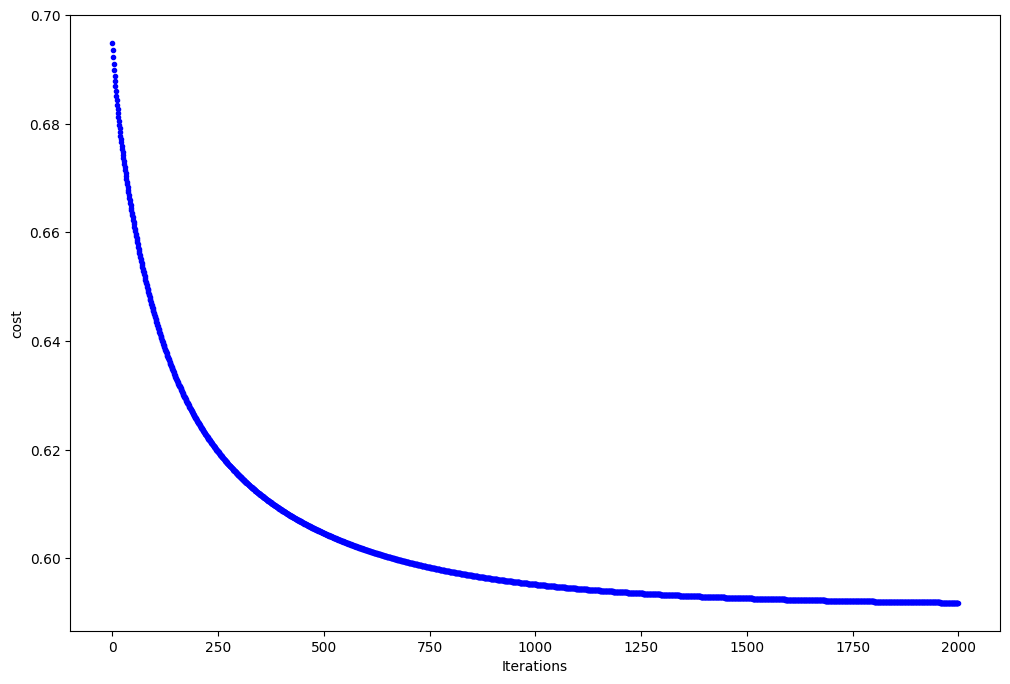

In [349]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('cost')
ax.set_xlabel('Iterations')
_=ax.plot(range(iteration), costPerIteration,'b.')

In [350]:
def confusion_matrix(y, y_pred, threshold):
    tp, fp, tn, fn, = 0, 0, 0, 0
    ind = 0
    while ind < len(y_pred):
        if (y_pred[ind]>= threshold):
            if (y[ind]== 1):
                tp+=1
            elif y[ind]== 0:
                fp+=1
        elif (y_pred[ind]< threshold):
            if (y[ind]==1):
                fn+=1
            elif (y[ind]== 0):
                tn+=1
        ind+=1

    accuracy = (tp + tn)/(fp + fn + tp + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 / ((1 / precision) + (1 / recall))
    
    print(f"true positive: {tp}, false positive: {fp}\ntrue negative: {tn}, false negative: {fn}\n")
    print(f"accuracy = {accuracy}")
    print(f"precision = {precision}")
    print(f"recall = {recall}")
    print(f"F1 = {F1}\n")

X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
z = np.dot(X_train, weight)
y_train_pred = 1 / (1 + np.exp(-z))
y_train = y_train.reset_index(drop=True)
confusion_matrix(y_train, y_train_pred, 0.5)


X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
z = np.dot(X_test, weight)
y_test_pred = 1 / (1 + np.exp(-z))
y_test = y_test.reset_index(drop=True)
confusion_matrix(y_test, y_test_pred, 0.5)

true positive: 5328, false positive: 2316
true negative: 5672, false negative: 2684

accuracy = 0.6875
precision = 0.6970172684458399
recall = 0.6650024962556166
F1 = 0.680633622892182

true positive: 1284, false positive: 520
true negative: 1492, false negative: 704

accuracy = 0.694
precision = 0.7117516629711752
recall = 0.6458752515090543
F1 = 0.6772151898734178



[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 9.91053678e-01 9.50298211e-01
 8.79224652e-01 8.13618290e-01 7.53976143e-01 7.07753479e-01
 6.55069583e-01 5.98906561e-01 5.46719682e-01 4.86083499e-01
 4.36878728e-01 3.83697813e-01 3.34990060e-01 2.91749503e-01
 2.58449304e-01 2.34095427e-01 2.09741551e-01 1.90357853e-01
 1.72465209e-01 1.49105368e-01 1.27733598e-01 1.10834990e-01
 9.39363817e-02 8.00198807e-02 6.66003976e-02 5.66600398e-02
 4.27435388e-02 3.03180915e-02 1.93836978e-02 9.94035785e-03
 2.98210736e-03 9.94035785e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[1.         1.         1.         1.         1.         1.
 0.99949698 0.9944668  0.98189135 0.96881288 0.95623742 0.94265594
 0.92354125 0.9054326  0.87676056 0.84305835 0.80583501 0.76861167
 0.72334004 0.68712274 0.64587525 0.61418511 0.56991952 0.53219316
 0.48541247 0.44315895 0.39637827 0.35261569 0.31589537 0.28118712
 0.23591549 0.18863179 0.15342052 0.11971831 0

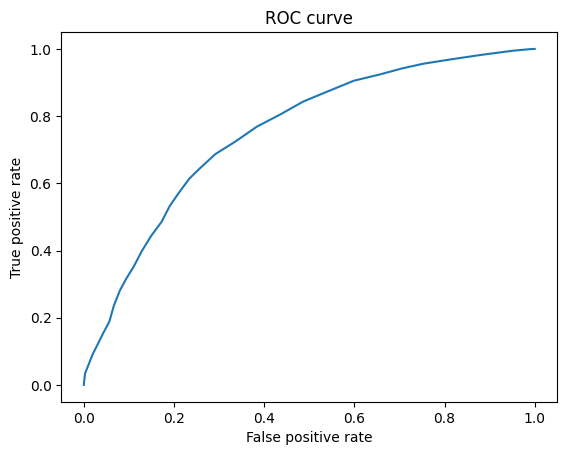

In [354]:
def get_true_false_positive(y, y_pred, threshold):
    tp, fp, tn, fn, = 0, 0, 0, 0
    ind = 0
    while ind < len(y_pred):
        if (y_pred[ind]>= threshold):
            if (y[ind]== 1):
                tp+=1
            elif y[ind]== 0:
                fp+=1
        elif (y_pred[ind]< threshold):
            if (y[ind]==1):
                fn+=1
            elif (y[ind]== 0):
                tn+=1
        ind+=1
    tpr = tp / (tp+fn)
    fpr = fp / (tn+fp)
    return tpr, fpr

def calculate_area(x, y):
    area = 0
    for i in range(1, len(x)):
        wid = x[i] - x[i-1]
        height = (y[i] + y[i-1])/2
        area += wid * height
    return area

def roc(y, y_pred, thresholds):
    tpr = np.zeros(len(thresholds))
    fpr = np.zeros(len(thresholds))
    for i in range(len(thresholds)):
        tpr[i], fpr[i] = get_true_false_positive(y, y_pred, thresholds[i])
    plt.plot(fpr, tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    print(fpr)
    print(tpr)
    area = calculate_area(fpr, tpr)
    print(f"AUC: {area}")


step = 0.025
thresholds = [i * step for i in range(int(1 / step) + 1)]
roc(y_test, y_test_pred, thresholds)

In [ ]:
df = pd.read_csv("lending-club-data2a.csv")
df.head(5)

In [ ]:
df['credit'].value_counts()

In [ ]:
df['term'] = df['term'].str.split().str[0]

mapping = {"RENT": 1, "MORTGAGE":2, "OWN":3, "OTHER": 0}
df['home_ownership'] = df['home_ownership'].map(mapping)

purpose_col = df[['purpose']]
encoder = OneHotEncoder()
encoder.fit(purpose_col)

encoded_column = encoder.transform(purpose_col).toarray()
encoded_df = pd.DataFrame(encoded_column, columns=encoder.get_feature_names_out(['purpose']))

df = pd.concat([df, encoded_df], axis=1)
df = df.drop(columns=['purpose'])
df.head()